<a href="https://colab.research.google.com/github/abhaswanchu1/mids-207-final-project/blob/main/Abhas_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import kagglehub
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1


In [49]:
import pandas as pd

df = pd.read_csv(path + "/Combined Data.csv")
df.head()
#Will drop the unnamed column, extra index

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


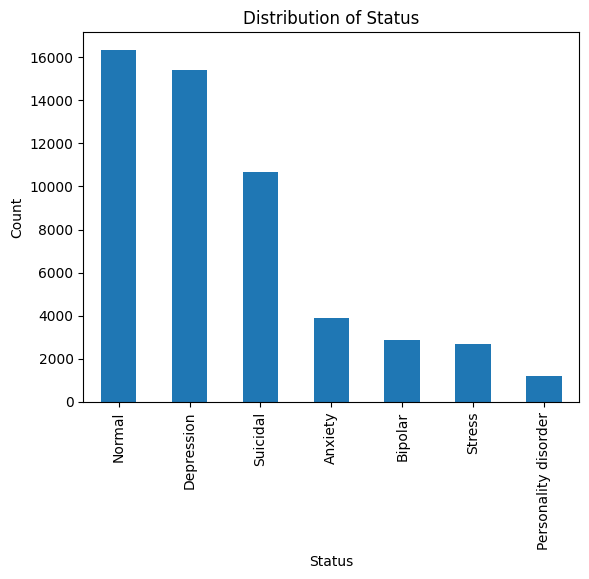

In [50]:
#Plot distribution of status
df['status'].value_counts().plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Imbalanced classes!

In [51]:
print(df['status'].value_counts())

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


In [52]:
df.describe(include = 'all')

,Unnamed: 0,statement,status
count,53043.000000,52681,53043
unique,NaN,51073,7
top,NaN,what do you mean?,Normal
freq,NaN,22,16351
mean,26521.000000,NaN,NaN
std,15312.339501,NaN,NaN
min,0.000000,NaN,NaN
25%,13260.500000,NaN,NaN
50%,26521.000000,NaN,NaN
75%,39781.500000,NaN,NaN


In [53]:
df_new = df.drop('Unnamed: 0', axis=1)
df_new.describe(include = 'all')

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


Interesting that there are 52,681 statements but 51,073 are unique. So some are duplicates. I wonder if their status is the same?

In [78]:
import pandas as pd


duplicate_statements = df_new[df_new['statement'].duplicated(keep=False)]['statement'].unique()

# Create a dictionary to store the results
duplicate_status_comparison = {}

# Iterate through duplicate statements
for statement in duplicate_statements:
  # Get all rows with the current duplicate statement
  rows_with_statement = df_new[df_new['statement'] == statement]

  # Check if 'status' values are different
  different_status = rows_with_statement['status'].nunique() > 1

  # Store the result in the dictionary
  duplicate_status_comparison[statement] = different_status


# Count the occurrences of True and False
false_count = sum(value == False for value in duplicate_status_comparison.values())
true_count = sum(value == True for value in duplicate_status_comparison.values())

# Print the counts
print(f"Different Status: False Count: {false_count}")
print(f"Different Status: True Count: {true_count}")

Different Status: False Count: 1385
Different Status: True Count: 18


So we do have same duplicate statements that have been given a different status. Let's explore further.

In [83]:
for statement, has_different_status in duplicate_status_comparison.items():
    if has_different_status:
        print(f"Statement: {statement}")
        print(f"Statuses: {df_new[df_new['statement'] == statement]['status'].unique()}")
        print("-" * 20)  # Separator for better readability

Statement: All this work, all this pressure that everyone puts on you to succeed. To go to a good college, get a good job, the normal things a lot of parents ask. All for what? I work my entire life and then what? Am I supposed to enjoy my ofttimes from studying or working being an ugly, socially awkward loser? Not able to talk to anyone, have friends; even when doing normally enjoyed things (video games, time off, etc.) all I can think about is how everyone else is probably enjoying their time with other people. Am I working for something or am I just working for the sake of working just because everyone tells me that is what I am supposed to do. Do people only tell you it gets better for the sake of having one more wage slave satisfy their demand for goods? What is this all for? All for what?
Statuses: ['Suicidal' 'Depression']
--------------------
Statement: #NAME?
Statuses: ['Depression' 'Suicidal' 'Normal' 'Stress']
--------------------
Statement: Recently I have started this inte

Interesting... We'll have to decide how to deal with these.... These may be a function of the data sources and the same post being pulled in twice (see data sources discussion at the end)

Next let's explore null values:

In [55]:
df['statement'].isnull().sum()
#362 null values, will remove these

362

In [56]:
df['status'].isnull().sum()
#no null status values

0

In [71]:
df[df['statement'].isnull()]['status'].value_counts()

,count
status,
Personality disorder,124
Bipolar,100
Stress,82
Anxiety,47
Normal,8
Suicidal,1


Null statements have been mischaracterized as above. Or it could be that these were in a different language and we couldn't read them in? Something to look into....

In [57]:
df_new.drop(df_new[df_new['statement'].isnull()].index, inplace=True)
df_new.drop(df_new[df_new['status'].isnull()].index, inplace=True)
#Drop all null values

In [58]:
df_new['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


Imbalanced classes.

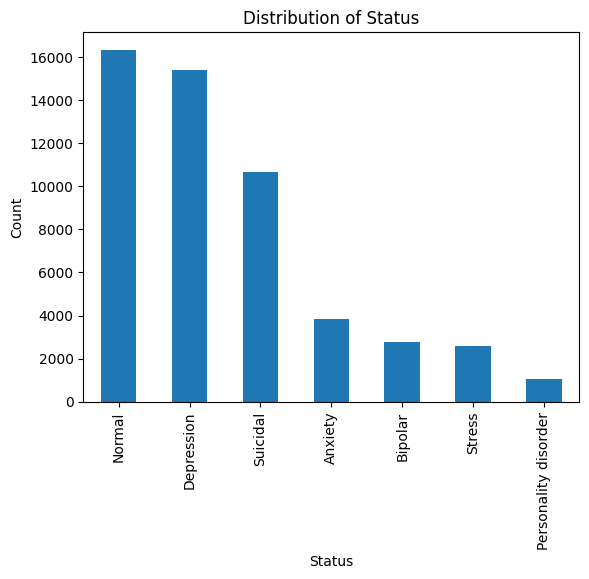

In [59]:
#Plot distribution of status
df_new['status'].value_counts().plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Imbalanced classes.

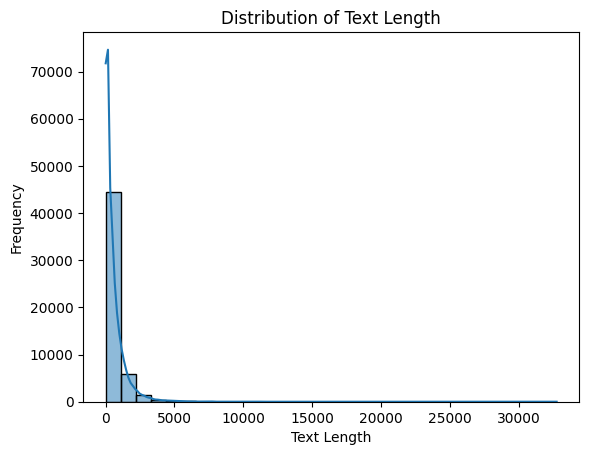

In [61]:
import seaborn as sns
df_new['text_length'] = df_new['statement'].astype(str).apply(len)
sns.histplot(df_new['text_length'], kde=True, bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Histogram. Not very useful though with the big outliers.

In [63]:
df_new['text_length'].describe()

,text_length
count,52681.000000
mean,578.713863
std,846.269078
min,2.000000
25%,80.000000
50%,317.000000
75%,752.000000
max,32759.000000


Distribution of all statements.

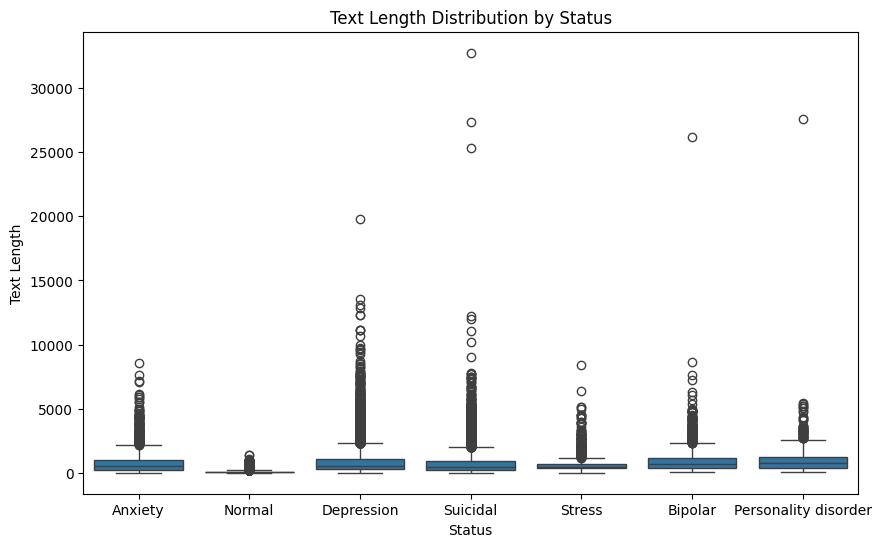

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='text_length', data=df_new)
plt.title('Text Length Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Text Length')
plt.show()


Interesting to see the outliers of each label. Shows that a lot of statements are short in nature, but we have a significant amount for each label in Quartile 4 that have a very high text length.

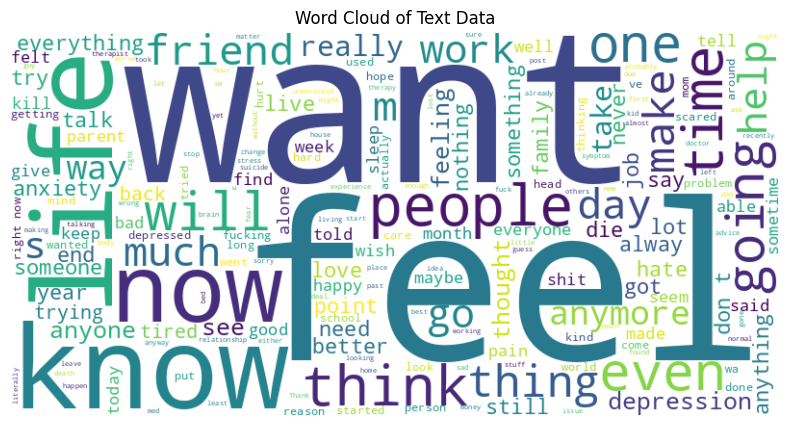

In [65]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text data
text_data = ' '.join(df_new['statement'].astype(str).tolist())

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

Simple wordcloud to see most frequently occuring words. Any takeaways? Feel, know, want, think are "active" words.

In [66]:
import re
import itertools
def find_special_characters(text):
  """
  Finds and returns special characters in a string.

  Args:
    text: The input string.

  Returns:
    A list of special characters found in the string.
  """
  special_characters = re.findall(r"[^a-zA-Z0-9\s]", text)
  return special_characters

# Example usage:
special_chars = (df_new['statement']).apply(find_special_characters)
all_special_chars = list(itertools.chain.from_iterable(special_chars))
unique_special_chars = list(set(all_special_chars))
print("Special characters:", unique_special_chars)

Special characters: ['\x9a', '😜', '”', 'ı', '–', 'à', '_', '¶', '&', '🥳', '§', '𝗴', '+', '😞', '💕', '♂', '🖕', 'ž', '𝗶', '😌', ')', '♥', '-', '¤', '^', 'ë', 'ˆ', '?', 'ể', 'ç', '🏴', '›', '🔥', '\x82', '❌', 'Ä', '💚', '\x95', '\x90', '⏳', 'ę', 'á', '🤩', 'º', '$', '\x9f', ']', '\x88', '\x84', '🤷', 'â', '\ufeff', '😱', '😍', '⛽', '😩', '😚', 'Ê', '\xad', '😬', 'Ì', '´', '>', '‐', '🥱', '⬇', '☹', '\x8e', '🥰', '🤞', '🥺', 'œ', '😊', '¹', '𝗘', '💗', '😪', '’', 'ä', '\x99', '❤', '†', '“', '⚠', '😵', '³', '🏼', '🐟', '😅', '¥', '—', '\x8f', '…', 'ê', '¿', '×', '|', '\u202c', 'ì', '🌊', '\u202d', 'ủ', 'Œ', 'ỳ', '👍', '\x89', '‡', '✨', '\u2060', '🛑', '(', '𝟭', '✅', 'Í', '🌷', '\x8a', 'é', '¯', '𝗠', 'ó', '˜', '➡', '𝘀', '¾', '🖤', '\x97', '💝', '¬', '²', ',', '😦', '🙏', '\u200e', '%', '𝗮', '/', '«', '𝗧', '±', '¡', '😨', '💀', '😢', '🤣', '☠', 'Đ', '‰', '©', '[', "'", 'Æ', '😂', '\\', '🤫', '𝘂', '𝗽', 'ƒ', '️', '}', 'µ', '𝗱', '*', 'ö', '💛', 'đ', 'Ï', '🏽', '𝗹', '😓', '💨', '😑', '😐', 'ợ', '•', '¼', '🔃', '🚩', '⛅', '\x8c', '🤭', '⁉', '🎓'

Mayebe we keep special characters in and have them classified as OOV? or exclude all? There might be some value in keeping them as it can change the meaning of the statement.

**Other Notes about the data**

This dataset amalgamates raw data from multiple sources, is cleaned and compiled.

Data comes from diverse platforms including social media posts, Reddit posts, Twitter posts, and more.

**Diving into the different sources of data**

3k Conversations Dataset for Chatbot
- Conversations from casual or formal discussions, interviews, customer service interactions, social media conversations. No labels, just a column for questions, and a column for answers.
n = 3,724

Depression Reddit Cleaned
- Web scraping Subreddits and cleaned using NLP techniques. Only in English.
Label: is_depression
n = 7,650

Human Stress Prediction
- Data posted on subreddits related to mental health.
Labels: 1 or 0 for Stress or No Stress. Features: subreddit, text, confidence
n = 2,343

Predicting Anxiety in Mental Health Data
- Derived from posts or text data from subreddit: r/healthanxiety
label: Anxiety
n = 1,919

Mental Health Dataset Bipolar
- Extracted from Reddit posts in a subreddit focused on bipolar disorder. 97% came from bipolarreddit
label: Bipolar
n = 2,677

Reddit Mental Health Data
- Sourced from subreddits concerened with mental health based conversations
Labels: 0 = Stress, 1 = Depression, 2 = Bipolar disorder, 3 = Personality disorder, 4 = Anxiety
n = 5,957

Students Anxiety and Depression Dataset
- Data from social media, facebook comments, posts. Data annotation done by English speakers who were undergraduate students.  
labels: Anxiety or depression =  1, 0 = No
n = 6,980

Suicidal Mental Health Dataset
- This content was created during Mental Health Week, but doesn't say where it came from.
labels: Depression, SuicideWatch
n = 20,339

Suicidal Tweet Detection Dataset
- Collection of tweets alongside annotation of whether it is related to suicide or not. Dataset generated internally for this NLP project.
labels: Potentially Suicidal, Not Suicidal
n = 1,778